# NOT IMPLEMENTED

Might combine explore and cleaning

In [ ]:
# CMDs for visualisation


# 




In [ ]:
# usage: specify file location
filepath = '../Data_git_ignore/1mio-raw.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
entire_df = pd.read_csv(filepath, index_col = [0])

In [1]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [2]:
def execQuery(query):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "root",
                                      host = "localhost",
                                      port = "5432",
                                      database = "exploration")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

In [4]:
#Domains with fake articles after 2018-01-15
execQuery(
"""
SELECT DISTINCT domain_name.domain_name FROM fakenews.domain_name
INNER JOIN fakenews.article
ON article.domain_id = domain_name.domain_id
WHERE article.type_id = '7' and scraped_at >= '2018-01-15'

""")

Executed query and closed connection.


[('thefreethoughtproject.com',),
 ('theduran.com',),
 ('theantimedia.org',),
 ('veteransnewsnow.com',),
 ('conservativeoutfitters.com',),
 ('ahtribune.com',),
 ('guccifer2.wordpress.com',),
 ('ifyouonlynews.com',),
 ('coasttocoastam.com',),
 ('madworldnews.com',),
 ('anonews.co',),
 ('blackagendareport.com',),
 ('awm.com',),
 ('wikileaks.org',),
 ('shareblue.com',),
 ('weaselzippers.us',),
 ('anonhq.com',),
 ('breakpoint.org',),
 ('allnewspipeline.com',),
 ('cnnnext.com',),
 ('jewsnews.co.il',),
 ('wikileaks.com',)]

In [29]:
execQuery(
"""
Select COUNT(authorid), domain_name
from 


""")

Executed query and closed connection.


[(Decimal('211'),)]

In [2]:
conn = psycopg2.connect(database='Database1', user ='postgres',password='detminkode', host ='localhost', port='5432')

In [3]:
q4_1 = """SELECT sum(length(content))/COUNT(id) as AvgLen, type
from article
Inner join type
ON article.type_id = type.type_id
GROUP BY type
ORDER BY AvgLen ASC """

In [9]:
q4_1

'Select Count(id)\nfrom article'

In [4]:
df = pd.read_sql_query(q4_1, conn)
df

,avglen,type
0,334,hate
1,1711,clickbait
2,1869,unreliable
3,2603,reliable
4,2655,None
5,2719,bias
6,2779,junksci
7,3977,political
8,3993,fake
9,4958,conspiracy


In [5]:
#test dataframe
df1 = pd.DataFrame()

df1['x'] = random.sample(range(1, 100), 25)
df1['y'] = random.sample(range(1, 100), 25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

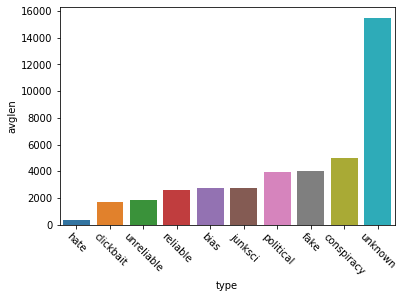

In [15]:
sns.barplot(x='type', y='avglen', data=df)
plt.xticks(rotation = -45)

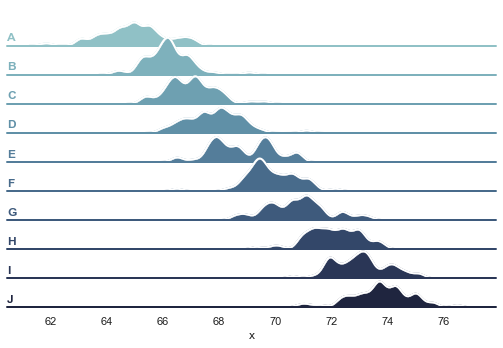

In [14]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(999)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [9]:
x

array([ 1.27157844e-01,  1.40189088e+00,  3.14814987e-01, -8.58449164e-01,
       -2.66134437e-01, -6.48900710e-01,  1.56626757e+00, -2.09137019e+00,
        1.45632806e+00,  9.45293415e-01, -4.00201194e-01,  3.15227304e-01,
       -1.11006083e+00, -5.84821525e-01, -1.88409564e-01,  8.13023649e-01,
       -1.61304716e-01,  1.60087155e+00,  9.84342575e-01, -8.35447373e-01,
       -1.86649340e-01, -8.58067074e-01, -7.59778159e-01, -1.51205424e+00,
        1.74777474e+00,  2.13005498e+00,  7.11542235e-02, -1.84164224e+00,
       -3.52590698e-01, -4.08903795e-01,  5.59310171e-01,  4.74013097e-01,
       -1.70263337e+00, -1.30828655e+00,  4.24831738e-01,  6.66868345e-03,
       -4.70683277e-01,  4.80522162e-01,  1.06618630e+00,  1.15631841e+00,
       -2.40975167e-03,  6.92448453e-02,  8.47024068e-01,  6.61684352e-01,
       -7.08233760e-01, -4.98605435e-01,  6.04875725e-01,  3.00543132e-01,
       -2.51228669e-01,  5.56110081e-01,  5.54605922e-01,  9.96300274e-02,
       -7.87672409e-01,  